## Student Performance Analysis and Prediction

### Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import plotly.express as pe
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # For Hyperparameter Tunning for better model performance
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN

#Model Tools
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier




pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Loading and Understanding the Dataset

In [51]:
# Loading the dataset
df = pd.read_csv('Data\Student_performance_data _.csv')
df.head().T


,0,1,2,3,4
StudentID,1001.000000,1002.000000,1003.000000,1004.000000,1005.000000
Age,17.000000,18.000000,15.000000,17.000000,17.000000
Gender,1.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,0.000000,0.000000,2.000000,0.000000,0.000000
ParentalEducation,2.000000,1.000000,3.000000,3.000000,2.000000
StudyTimeWeekly,19.833723,15.408756,4.210570,10.028829,4.672495
Absences,7.000000,0.000000,26.000000,14.000000,17.000000
Tutoring,1.000000,0.000000,0.000000,0.000000,1.000000
ParentalSupport,2.000000,1.000000,2.000000,3.000000,3.000000
Extracurricular,0.000000,0.000000,0.000000,1.000000,0.000000


In [52]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


(2392, 15)

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


The dataset contains a total of 2392 observation with 15 coulmns.<br>
From the observation all the variables have zero non-null values.<br>
The avearage age of the students is 16.47 with max age 18 years with the age bracket ranging from 15 to 18 years.<br>
Average GPA is 1.9 ranging from 0 to 4. With the Mean GradeClass of approximately 2.98 ranging from 0 to 4.<br>

In [54]:
#checking for number of dublicates
df.duplicated().sum()

0

In [55]:
#Using the copy of the original dataset for further analysis
df_copy = df.copy()


In [56]:
# Droping the student id column as it is not useful for the analysis and this will result in now having only 14 columns
df_copy.drop(columns=['StudentID'], inplace=True, axis=1)
df_copy.head().T

,0,1,2,3,4
Age,17.000000,18.000000,15.000000,17.000000,17.000000
Gender,1.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,0.000000,0.000000,2.000000,0.000000,0.000000
ParentalEducation,2.000000,1.000000,3.000000,3.000000,2.000000
StudyTimeWeekly,19.833723,15.408756,4.210570,10.028829,4.672495
Absences,7.000000,0.000000,26.000000,14.000000,17.000000
Tutoring,1.000000,0.000000,0.000000,0.000000,1.000000
ParentalSupport,2.000000,1.000000,2.000000,3.000000,3.000000
Extracurricular,0.000000,0.000000,0.000000,1.000000,0.000000
Sports,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
#checking the data types of the columns
df_copy.dtypes

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

## Data Visiualization

In [58]:
#Class Distribution of the target variable 'GradeClass'
class_counts = df_copy['GradeClass'].value_counts(normalize=True).reset_index()
class_counts.columns = ['GradeClass', 'proportion']
class_counts['proportion'] = class_counts['proportion'].round(2)

# Find the color for the bar with the highest proportion
max_proportion_index = class_counts['proportion'].idxmax()
colors = ['#3498db' if i != max_proportion_index else '#e74c3c' for i in range(len(class_counts))]
fig1 = go.Figure(data=[go.Bar(
    x=class_counts['GradeClass'],
    y=class_counts['proportion'],
    marker_color=colors,
    text=class_counts['proportion'],
    opacity=0.75,
)])

fig1.update_layout(
    title="Grade_Class Class Distribution",
    xaxis_title="Grade Class",
    yaxis_title="Fractionality Proportion %"
)

In [59]:
# Statistical summary of GradeClass
grade_class_summary = df_copy['GradeClass'].value_counts(normalize=False).reset_index()
grade_class_summary.columns = ['GradeClass', 'count']
grade_class_summary['proportion'] = (grade_class_summary['count'] / len(df_copy)).round(2)
print(grade_class_summary)

   GradeClass  count  proportion
0         4.0   1211        0.51
1         3.0    414        0.17
2         2.0    391        0.16
3         1.0    269        0.11
4         0.0    107        0.04


In [60]:
# Correlation analysis to dentify features that are strongly correlated with GradeClass,
correlation_matrix = df_copy.corr()
print(correlation_matrix['GradeClass'].sort_values(ascending=False))

GradeClass           1.000000
Absences             0.728633
ParentalEducation    0.041031
Gender               0.022998
Volunteering         0.013156
Age                 -0.006250
Ethnicity           -0.023326
Sports              -0.026654
Music               -0.036065
Extracurricular     -0.069733
Tutoring            -0.111695
StudyTimeWeekly     -0.134131
ParentalSupport     -0.136823
GPA                 -0.782835
Name: GradeClass, dtype: float64


The dataset shows a proprotion of GradeClass (target variable ) 4 having the higest proportion than others indicating an imbalance dataset.<br>
Also the correction of GradeClass to the other feature shows that GradeClass have a good positive correlation with Absences and a good negative correlation with the GPA. This Implies that this two features are paramount and should be considered in the modeling -  suggesting that higher absences are linked to a worse grade classification and higher GPA is associated with higer Grades.

In [61]:
 #Top 5 Correlated Features with GradeClass
target_corr = correlation_matrix["GradeClass"].drop("GradeClass").sort_values()
top_corr = pd.concat([target_corr.head(5), target_corr.tail(5)])
bar = go.Figure(data=go.Bar(
    x=top_corr.values,
    y=top_corr.index,
    orientation='h',
    marker_color='steelblue'
))
bar.update_layout(
    title="Top Features Correlated with Grade Class",
    xaxis_title="Correlation Coefficient",
    yaxis_title="Feature"
)

## Univariate Plots

In [62]:
# Creating function to plot the distribution of each feature in the dataset
def plot_hist(colname, df=df_copy):
    unique_values = df[colname].nunique()
    
    if unique_values > 20:  # Threshold: if many unique values, treat as continuous
        fig = pe.histogram(df, x=colname, nbins=15, title=f"Distribution of {colname}")
    else:
        vc = df[colname].value_counts().sort_values(ascending=False)
        fig = go.Figure(
            data=[
                go.Bar(
                    x=[str(i) for i in vc.index],
                    y=vc.values
                )
            ],
            layout=go.Layout(
                title=colname,
                xaxis_title=colname,
                yaxis_title='Count'
            )
        )
    fig.show()


In [63]:
# Getting the list of plottable columns
plottable_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Removing the target variable 'GradeClass' from the list of plottable columns

plot_columns = ['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GPA']

In [64]:
# Making various plots for the features in the dataset
for col in plot_columns:
    plot_hist(col)

## Bivariate Plots


In [65]:
def plot_bivariate(colname, target='GradeClass', df=df_copy):
    unique_values = df[colname].nunique()

    if df[colname].dtype in ['float64', 'int64'] and unique_values > 20:
        # Continuous feature vs categorical target → Box plot
        fig = pe.box(df, x=target, y=colname, points="all", title=f"{colname} vs {target}")
    else:
        # Categorical feature vs categorical target → Grouped bar chart
        ct = pd.crosstab(df[colname], df[target])
        fig = go.Figure()
        for t in ct.columns:
            fig.add_trace(go.Bar(
                x=[str(i) for i in ct.index],
                y=ct[t],
                name=str(t)
            ))
        fig.update_layout(
            barmode='group',
            title=f"{colname} vs {target}",
            xaxis_title=colname,
            yaxis_title="Count"
        )
    
    fig.show()


In [66]:
# Making various plots for the features in the dataset
for col in plot_columns:
    plot_bivariate(col)

## Modeling

In [67]:
#Defining the X and y variables for modeling
X = df_copy.drop(columns=['GradeClass'])
y = df_copy['GradeClass']
# Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [68]:
# Logistic Regression with class weights to handle class imbalance
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = model_weighted.predict(X_test_scaled)
y_proba_weighted = model_weighted.predict_proba(X_test_scaled)

report_weighted = classification_report(y_test, y_pred_weighted, output_dict=True)
auc_weighted = roc_auc_score(y_test, y_proba_weighted, multi_class="ovr")
cm_weighted = confusion_matrix(y_test, y_pred_weighted)

report_weighted, auc_weighted,cm_weighted

({'0.0': {'precision': 0.1568627450980392,
   'recall': 0.38095238095238093,
   'f1-score': 0.2222222222222222,
   'support': 21.0},
  '1.0': {'precision': 0.45454545454545453,
   'recall': 0.37037037037037035,
   'f1-score': 0.40816326530612246,
   'support': 54.0},
  '2.0': {'precision': 0.5443037974683544,
   'recall': 0.5512820512820513,
   'f1-score': 0.5477707006369427,
   'support': 78.0},
  '3.0': {'precision': 0.4,
   'recall': 0.5301204819277109,
   'f1-score': 0.45595854922279794,
   'support': 83.0},
  '4.0': {'precision': 0.958974358974359,
   'recall': 0.7695473251028807,
   'f1-score': 0.8538812785388128,
   'support': 243.0},
  'accuracy': 0.6304801670146137,
  'macro avg': {'precision': 0.5029372712172415,
   'recall': 0.5204545219270789,
   'f1-score': 0.4975992031853796,
   'support': 479.0},
  'weighted avg': {'precision': 0.7025595775069191,
   'recall': 0.6304801670146137,
   'f1-score': 0.6571426052469782,
   'support': 479.0}},
 0.8325609336177383,
 array([[  8,

In [69]:
# Predictions and probability scores from logisticRegression model
report_weighted_summary = {
    "Accuracy": report_weighted["accuracy"],
    "AUC-ROC": auc_weighted ,    # Overall performance metric for imbalance data
    # "confusion_matrix" : cm_weighted
}

report_weighted_summary

{'Accuracy': 0.6304801670146137, 'AUC-ROC': 0.8325609336177383}

## Decision Tree model

<BarContainer object of 10 artists>

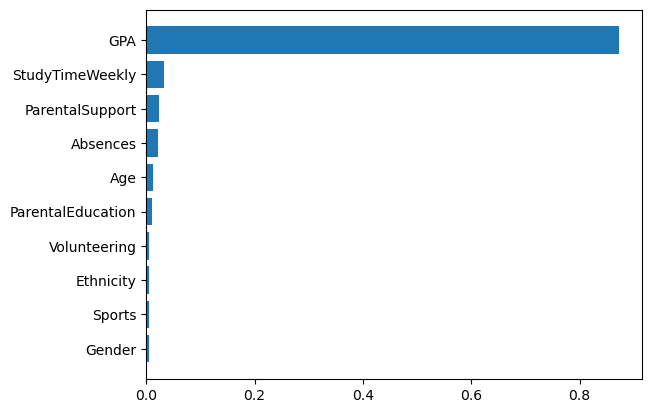

In [70]:
# Model with Decision Tree
# Instatiating Decision Tree model
model_Decision= DecisionTreeClassifier(class_weight='balanced', max_depth= 9, min_samples_leaf=4, random_state=42)
model_Decision.fit(X_train_scaled, y_train)
sorted_idx = model_Decision.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], model_Decision.feature_importances_[sorted_idx][-10:])

In [71]:
y_pred_Decision = model_Decision.predict(X_test_scaled)
y_proba_Decision = model_Decision.predict_proba(X_test_scaled)

report_Decision = classification_report(y_test, y_pred_Decision, output_dict=True)
auc_Decision = roc_auc_score(y_test, y_proba_Decision, multi_class="ovr")
cm_Decision = confusion_matrix(y_test, y_pred_Decision)

report_Decision, auc_Decision, cm_Decision

({'0.0': {'precision': 0.4583333333333333,
   'recall': 0.5238095238095238,
   'f1-score': 0.4888888888888889,
   'support': 21.0},
  '1.0': {'precision': 0.7777777777777778,
   'recall': 0.9074074074074074,
   'f1-score': 0.8376068376068376,
   'support': 54.0},
  '2.0': {'precision': 0.8875,
   'recall': 0.9102564102564102,
   'f1-score': 0.8987341772151899,
   'support': 78.0},
  '3.0': {'precision': 0.8589743589743589,
   'recall': 0.8072289156626506,
   'f1-score': 0.8322981366459627,
   'support': 83.0},
  '4.0': {'precision': 0.9444444444444444,
   'recall': 0.9094650205761317,
   'f1-score': 0.9266247379454927,
   'support': 243.0},
  'accuracy': 0.8747390396659708,
  'macro avg': {'precision': 0.7854059829059828,
   'recall': 0.8116334555424247,
   'f1-score': 0.7968305556604743,
   'support': 479.0},
  'weighted avg': {'precision': 0.8802606926824046,
   'recall': 0.8747390396659708,
   'f1-score': 0.876512021675554,
   'support': 479.0}},
 0.9016196533892117,
 array([[ 11,  

In [72]:
# Predictions and probability scores from Decision Tree model
report_Decision_summary = {
    "Accuracy": report_Decision["accuracy"],
    "AUC-ROC": auc_Decision ,    # Overall performance metric for imbalance data
    # "confusion_matrix" : cm_Decision
}

report_Decision_summary

{'Accuracy': 0.8747390396659708, 'AUC-ROC': 0.9016196533892117}

## Random Forest Model

<BarContainer object of 10 artists>

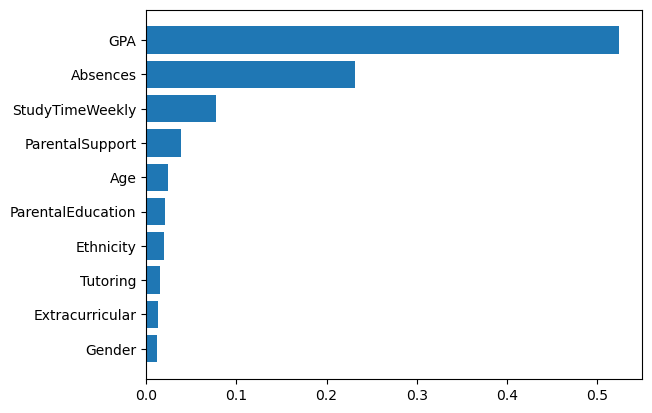

In [73]:
# Model with Random Forest
# Instatiating Random Forest model
model_RandomForest= RandomForestClassifier( n_estimators= 50,random_state=42, class_weight="balanced", max_depth= 15, min_samples_leaf=5)
model_RandomForest.fit(X_train_scaled, y_train)
sorted_idx = model_RandomForest.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], model_RandomForest.feature_importances_[sorted_idx][-10:])

In [74]:
y_pred_RandomForest = model_RandomForest.predict(X_test_scaled)
y_proba_RandomForest = model_RandomForest.predict_proba(X_test_scaled)

report_RandomForest = classification_report(y_test, y_pred_RandomForest, output_dict=True)
auc_RandomForest = roc_auc_score(y_test, y_proba_RandomForest, multi_class="ovr")
cm_RandomForest = confusion_matrix(y_test, y_pred_RandomForest)

report_RandomForest, auc_RandomForest, cm_RandomForest

({'0.0': {'precision': 1.0,
   'recall': 0.5238095238095238,
   'f1-score': 0.6875,
   'support': 21.0},
  '1.0': {'precision': 0.9056603773584906,
   'recall': 0.8888888888888888,
   'f1-score': 0.897196261682243,
   'support': 54.0},
  '2.0': {'precision': 0.9135802469135802,
   'recall': 0.9487179487179487,
   'f1-score': 0.9308176100628931,
   'support': 78.0},
  '3.0': {'precision': 0.891566265060241,
   'recall': 0.891566265060241,
   'f1-score': 0.891566265060241,
   'support': 83.0},
  '4.0': {'precision': 0.9402390438247012,
   'recall': 0.9711934156378601,
   'f1-score': 0.9554655870445344,
   'support': 243.0},
  'accuracy': 0.9248434237995825,
  'macro avg': {'precision': 0.9302091866314026,
   'recall': 0.8448352084228924,
   'f1-score': 0.8725091447699823,
   'support': 479.0},
  'weighted avg': {'precision': 0.9261858189687269,
   'recall': 0.9248434237995825,
   'f1-score': 0.9220626500366778,
   'support': 479.0}},
 0.9200672633711138,
 array([[ 11,   0,   3,   2,   5]

In [75]:
# Predictions and probability scores from Random Forest model
report_RandomForest_summary = {
    "Accuracy": report_RandomForest["accuracy"],
    "AUC-ROC": auc_RandomForest,     # Overall performance metric for imbalance data
    # "confusion_matrix": cm_RandomForest
}

report_RandomForest_summary

{'Accuracy': 0.9248434237995825, 'AUC-ROC': 0.9200672633711138}

## Gradient Boosting Model

In [76]:
# Model with Gradient Boosting
# Instatiating Gradient Boosting model
model_GradientBoosting= GradientBoostingClassifier( n_estimators= 50,random_state=42,  max_depth= 15, min_samples_leaf=5)
model_GradientBoosting.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=15, min_samples_leaf=5, n_estimators=50,
                           random_state=42)

<BarContainer object of 10 artists>

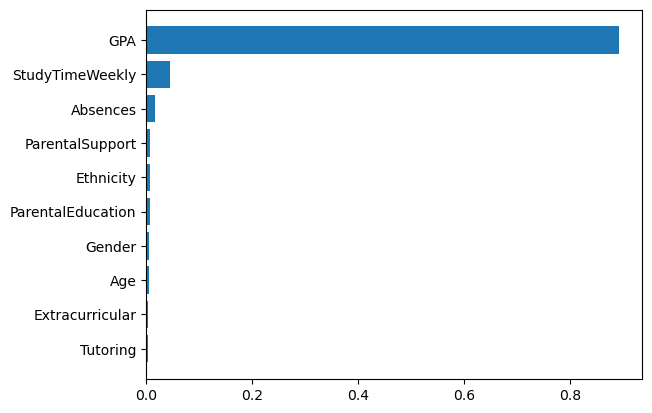

In [77]:
sorted_idx = model_GradientBoosting.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], model_GradientBoosting.feature_importances_[sorted_idx][-10:])

In [78]:
y_pred_GradientBoosting = model_GradientBoosting.predict(X_test_scaled)
y_proba_GradientBoosting = model_GradientBoosting.predict_proba(X_test_scaled)

report_GradientBoosting = classification_report(y_test, y_pred_GradientBoosting, output_dict=True)
auc_GradientBoosting = roc_auc_score(y_test, y_proba_GradientBoosting, multi_class="ovr")
cm_GradientBoosting = confusion_matrix(y_test, y_pred_GradientBoosting)

report_GradientBoosting, auc_GradientBoosting, cm_GradientBoosting

({'0.0': {'precision': 1.0,
   'recall': 0.47619047619047616,
   'f1-score': 0.6451612903225806,
   'support': 21.0},
  '1.0': {'precision': 0.9056603773584906,
   'recall': 0.8888888888888888,
   'f1-score': 0.897196261682243,
   'support': 54.0},
  '2.0': {'precision': 0.9135802469135802,
   'recall': 0.9487179487179487,
   'f1-score': 0.9308176100628931,
   'support': 78.0},
  '3.0': {'precision': 0.8809523809523809,
   'recall': 0.891566265060241,
   'f1-score': 0.8862275449101796,
   'support': 83.0},
  '4.0': {'precision': 0.9402390438247012,
   'recall': 0.9711934156378601,
   'f1-score': 0.9554655870445344,
   'support': 243.0},
  'accuracy': 0.9227557411273486,
  'macro avg': {'precision': 0.9280864098098306,
   'recall': 0.8353113988990829,
   'f1-score': 0.8629736588044862,
   'support': 479.0},
  'weighted avg': {'precision': 0.9243466699479495,
   'recall': 0.9227557411273486,
   'f1-score': 0.919281383490371,
   'support': 479.0}},
 0.9131427151276149,
 array([[ 10,   0, 

In [79]:
# Predictions and probability scores from Gradient Boosting model
report_GradientBoosting_summary = {
    "Accuracy": report_GradientBoosting["accuracy"],
    "AUC-ROC": auc_GradientBoosting ,   # Overall performance metric for imbalance data
    # "confusion_matrix" : cm_GradientBoosting
}

report_GradientBoosting_summary

{'Accuracy': 0.9227557411273486, 'AUC-ROC': 0.9131427151276149}

## XG BOOST MODELING

In [80]:
# Model with XG Boosting
# Instatiating XG Boosting model
model_XGBoost= XGBClassifier( 
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(), 
    eval_metric='logloss', 
    random_state= 42,
    n_estimators = 50,
    max_depth = 15,
    )
model_XGBoost.fit(X_train_scaled, y_train)

c:\Users\chukw\anaconda3\envs\Study\Lib\site-packages\xgboost\core.py:158: UserWarning:

[12:22:52] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

<BarContainer object of 10 artists>

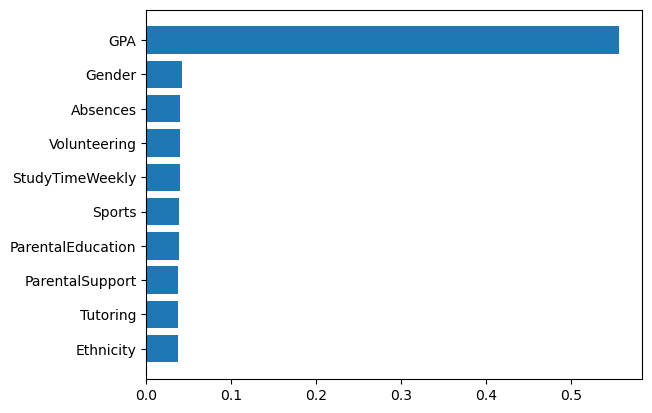

In [81]:
sorted_idx = model_XGBoost.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], model_XGBoost.feature_importances_[sorted_idx][-10:])

In [82]:
y_pred_XGBoost = model_XGBoost.predict(X_test_scaled)
y_proba_XGBoost = model_XGBoost.predict_proba(X_test_scaled)

report_XGBoost = classification_report(y_test, y_pred_XGBoost, output_dict=True)
auc_XGBoost = roc_auc_score(y_test, y_proba_XGBoost, multi_class="ovr")
cm_XGBoost = confusion_matrix(y_test, y_pred_XGBoost)

report_XGBoost, auc_XGBoost, cm_XGBoost

({'0.0': {'precision': 1.0,
   'recall': 0.47619047619047616,
   'f1-score': 0.6451612903225806,
   'support': 21.0},
  '1.0': {'precision': 0.8888888888888888,
   'recall': 0.8888888888888888,
   'f1-score': 0.8888888888888888,
   'support': 54.0},
  '2.0': {'precision': 0.9135802469135802,
   'recall': 0.9487179487179487,
   'f1-score': 0.9308176100628931,
   'support': 78.0},
  '3.0': {'precision': 0.8888888888888888,
   'recall': 0.8674698795180723,
   'f1-score': 0.8780487804878049,
   'support': 83.0},
  '4.0': {'precision': 0.932806324110672,
   'recall': 0.9711934156378601,
   'f1-score': 0.9516129032258065,
   'support': 243.0},
  'accuracy': 0.918580375782881,
  'macro avg': {'precision': 0.924832869760406,
   'recall': 0.8304921217906494,
   'f1-score': 0.8589058945975946,
   'support': 479.0},
  'weighted avg': {'precision': 0.9200604880917126,
   'recall': 0.918580375782881,
   'f1-score': 0.9149731627265942,
   'support': 479.0}},
 0.9051661755252773,
 array([[ 10,   1,  

In [83]:
# Predictions and probability scores from XG Boosting model
report_XGBoost_summary = {
    "Accuracy": report_XGBoost["accuracy"],
    "AUC-ROC": auc_XGBoost,   # Overall performance metric for imbalance data
    # "confusion_matrix" : cm_XGBoost
}

report_XGBoost_summary

{'Accuracy': 0.918580375782881, 'AUC-ROC': 0.9051661755252773}

## Model Results

In [84]:
# Model Result

Model_results = {
    "Logistic Regression": report_weighted_summary,
    "Decision Tree": report_Decision_summary,
    "Random Forest": report_RandomForest_summary,
    "Gradient Boosting": report_GradientBoosting_summary,
    "XG Boost": report_XGBoost_summary
}
Model_results
 # Convert to DataFrame
results_df = pd.DataFrame(Model_results).T
results_df = results_df.round(4).sort_values("AUC-ROC", ascending=False)
results_df

,Accuracy,AUC-ROC
Random Forest,0.9248,0.9201
Gradient Boosting,0.9228,0.9131
XG Boost,0.9186,0.9052
Decision Tree,0.8747,0.9016
Logistic Regression,0.6305,0.8326


In [85]:
metrics = results_df.columns.tolist()

fig = go.Figure()

for model in results_df.index:
    fig.add_trace(go.Bar(
        x=metrics,
        y=results_df.loc[model],
        name=model
    ))

fig.update_layout(
    title="Model Comparison by Evaluation Metrics",
    xaxis_title="Metric",
    yaxis_title="Score",
    barmode='group',
    template="plotly_white"
)

fig.show()

From the result the best model is Random Forest with accuracy of approximately **92%** and AUC (ie the overall performance metric for imbalance data) of **92%**. <br>
Its (**Random Forest**) classification results (Precision, recall, and F1 score) for each of the Grade Class (0 to 4) falls between **80% to 90%** with the exception of Grade Class **0** that have its recall and F1score slightly above **50% and 60%** respectively. Also, it have the two importance features(GPA and Absence) as the leading features.

## Evaluation of the Best Model

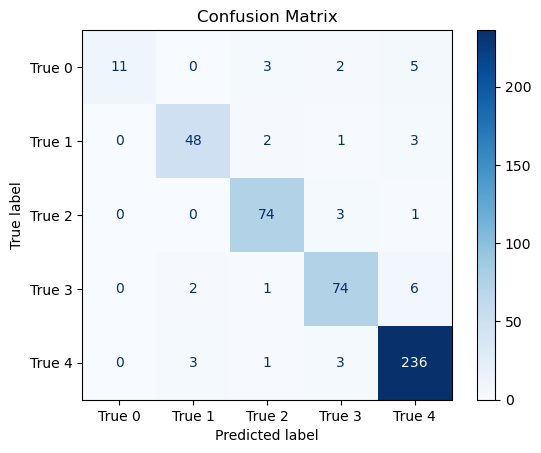

In [86]:
# Evalutaing the best model using confusion matrix
# Model is already trained and  have predictions
# Confusion Matrix for Random Forest model
ConfusionMatrixDisplay.from_predictions(y_test, model_RandomForest.predict(X_test_scaled),
                                        display_labels=['True 0', 'True 1', 'True 2', 'True 3', 'True 4'],
                                        cmap='Blues',
                                        values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [87]:
# Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}
# Using GridSearchCV for hyperparameter tuning with scoring as 'roc_auc_ovr'
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid =param_grid, 
    cv=5, 
    scoring='roc_auc_ovr', 
    n_jobs=-1,
    verbose=1
    )
grid_search.fit(X_train_scaled, y_train)
print("Best RF Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best RF Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC: 0.9311045568202223


There is an increase in AUC from approximately 92% to approximately 93%.<br>
This is a very strong AUC score, indicating that your model has excellent class separation performance on average across folds.

In [88]:
# Retraining the model with the best parameters
final_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
final_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=4, n_estimators=200, random_state=42)

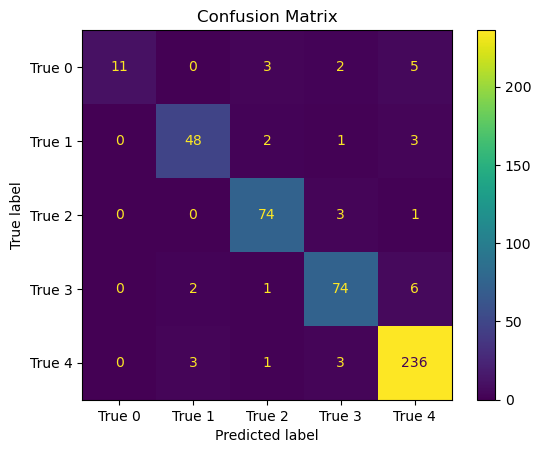

In [89]:
# Final evealuation of the model with confusing matrix 
ConfusionMatrixDisplay.from_predictions(y_test, final_model.predict(X_test_scaled),
                                        display_labels=['True 0', 'True 1', 'True 2', 'True 3', 'True 4'],
                                        cmap='viridis',
                                        values_format='d')
plt.title("Confusion Matrix")
plt.show()